# Flagging Loans Project


## Description:

The report will be made on data that contains information on repeated loans from current clients.

Using the available dataset, I will build a model that will predict the value of the target variable `bad_flag` and will argue for the choice of model chosen and show the expected default rate at different approval levels with detailed explanation.

<a id="import"></a>
# <p style="background:#00003f url('pylogo.jpg') no-repeat; font-family:tahoma; font-size:150%; color:white; text-align:center; border-radius:20px 30px; width:92%; padding:30px; font-weight:bold">Phase 1: Importing the needed Libraries and the Dataset</p>

In [1]:
# Let's import the necessary libraries

import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")


##### Algorithm Selection Imports #####
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier


In [2]:
# Read the dataset
df = pd.read_csv("test_task.csv")
df.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,0,3.0,NaN,NaN,33.0,False,0


-----------------------------

<a id="import"></a>
# <p style="background:#00003f url('pylogo.jpg') no-repeat; font-family:tahoma; font-size:150%; color:white; text-align:center; border-radius:20px 30px; width:92%; padding:30px; font-weight:bold">Phase 2: Exploratory Data Analysis</p>

In [3]:
# Checking if there are null values or not:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

In [4]:
df.select_dtypes(include=['int64', 'float64']).describe()

,loanKey,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,bad_flag
count,4157.000000,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000,4157.000000
mean,525386.651431,1.444444,0.733333,0.280000,1.184693,12.338225,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222,0.100313
std,202001.338206,0.900599,0.764572,0.502339,1.723715,9.902927,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143,0.300453
min,58567.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000,0.000000
25%,363964.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000,0.000000
50%,543603.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000,0.000000
75%,687271.000000,2.000000,1.000000,1.000000,2.000000,14.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000,0.000000
max,884377.000000,7.000000,5.000000,3.000000,31.000000,80.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000,1.000000


In [5]:
# Remove unncessary columns
df.drop(['loanKey','TraderKey'],axis=1, inplace=True)
df.columns

Index(['rep_loan_date', 'first_loan', 'dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt',
       'first_overdue_date', 'close_loans_cnt', 'federal_district_nm',
       'payment_type_0', 'payment_type_1', 'payment_type_2', 'payment_type_3',
       'payment_type_4', 'payment_type_5', 'past_billings_cnt', 'score_1',
       'score_2', 'age', 'gender', 'bad_flag'],
      dtype='object')

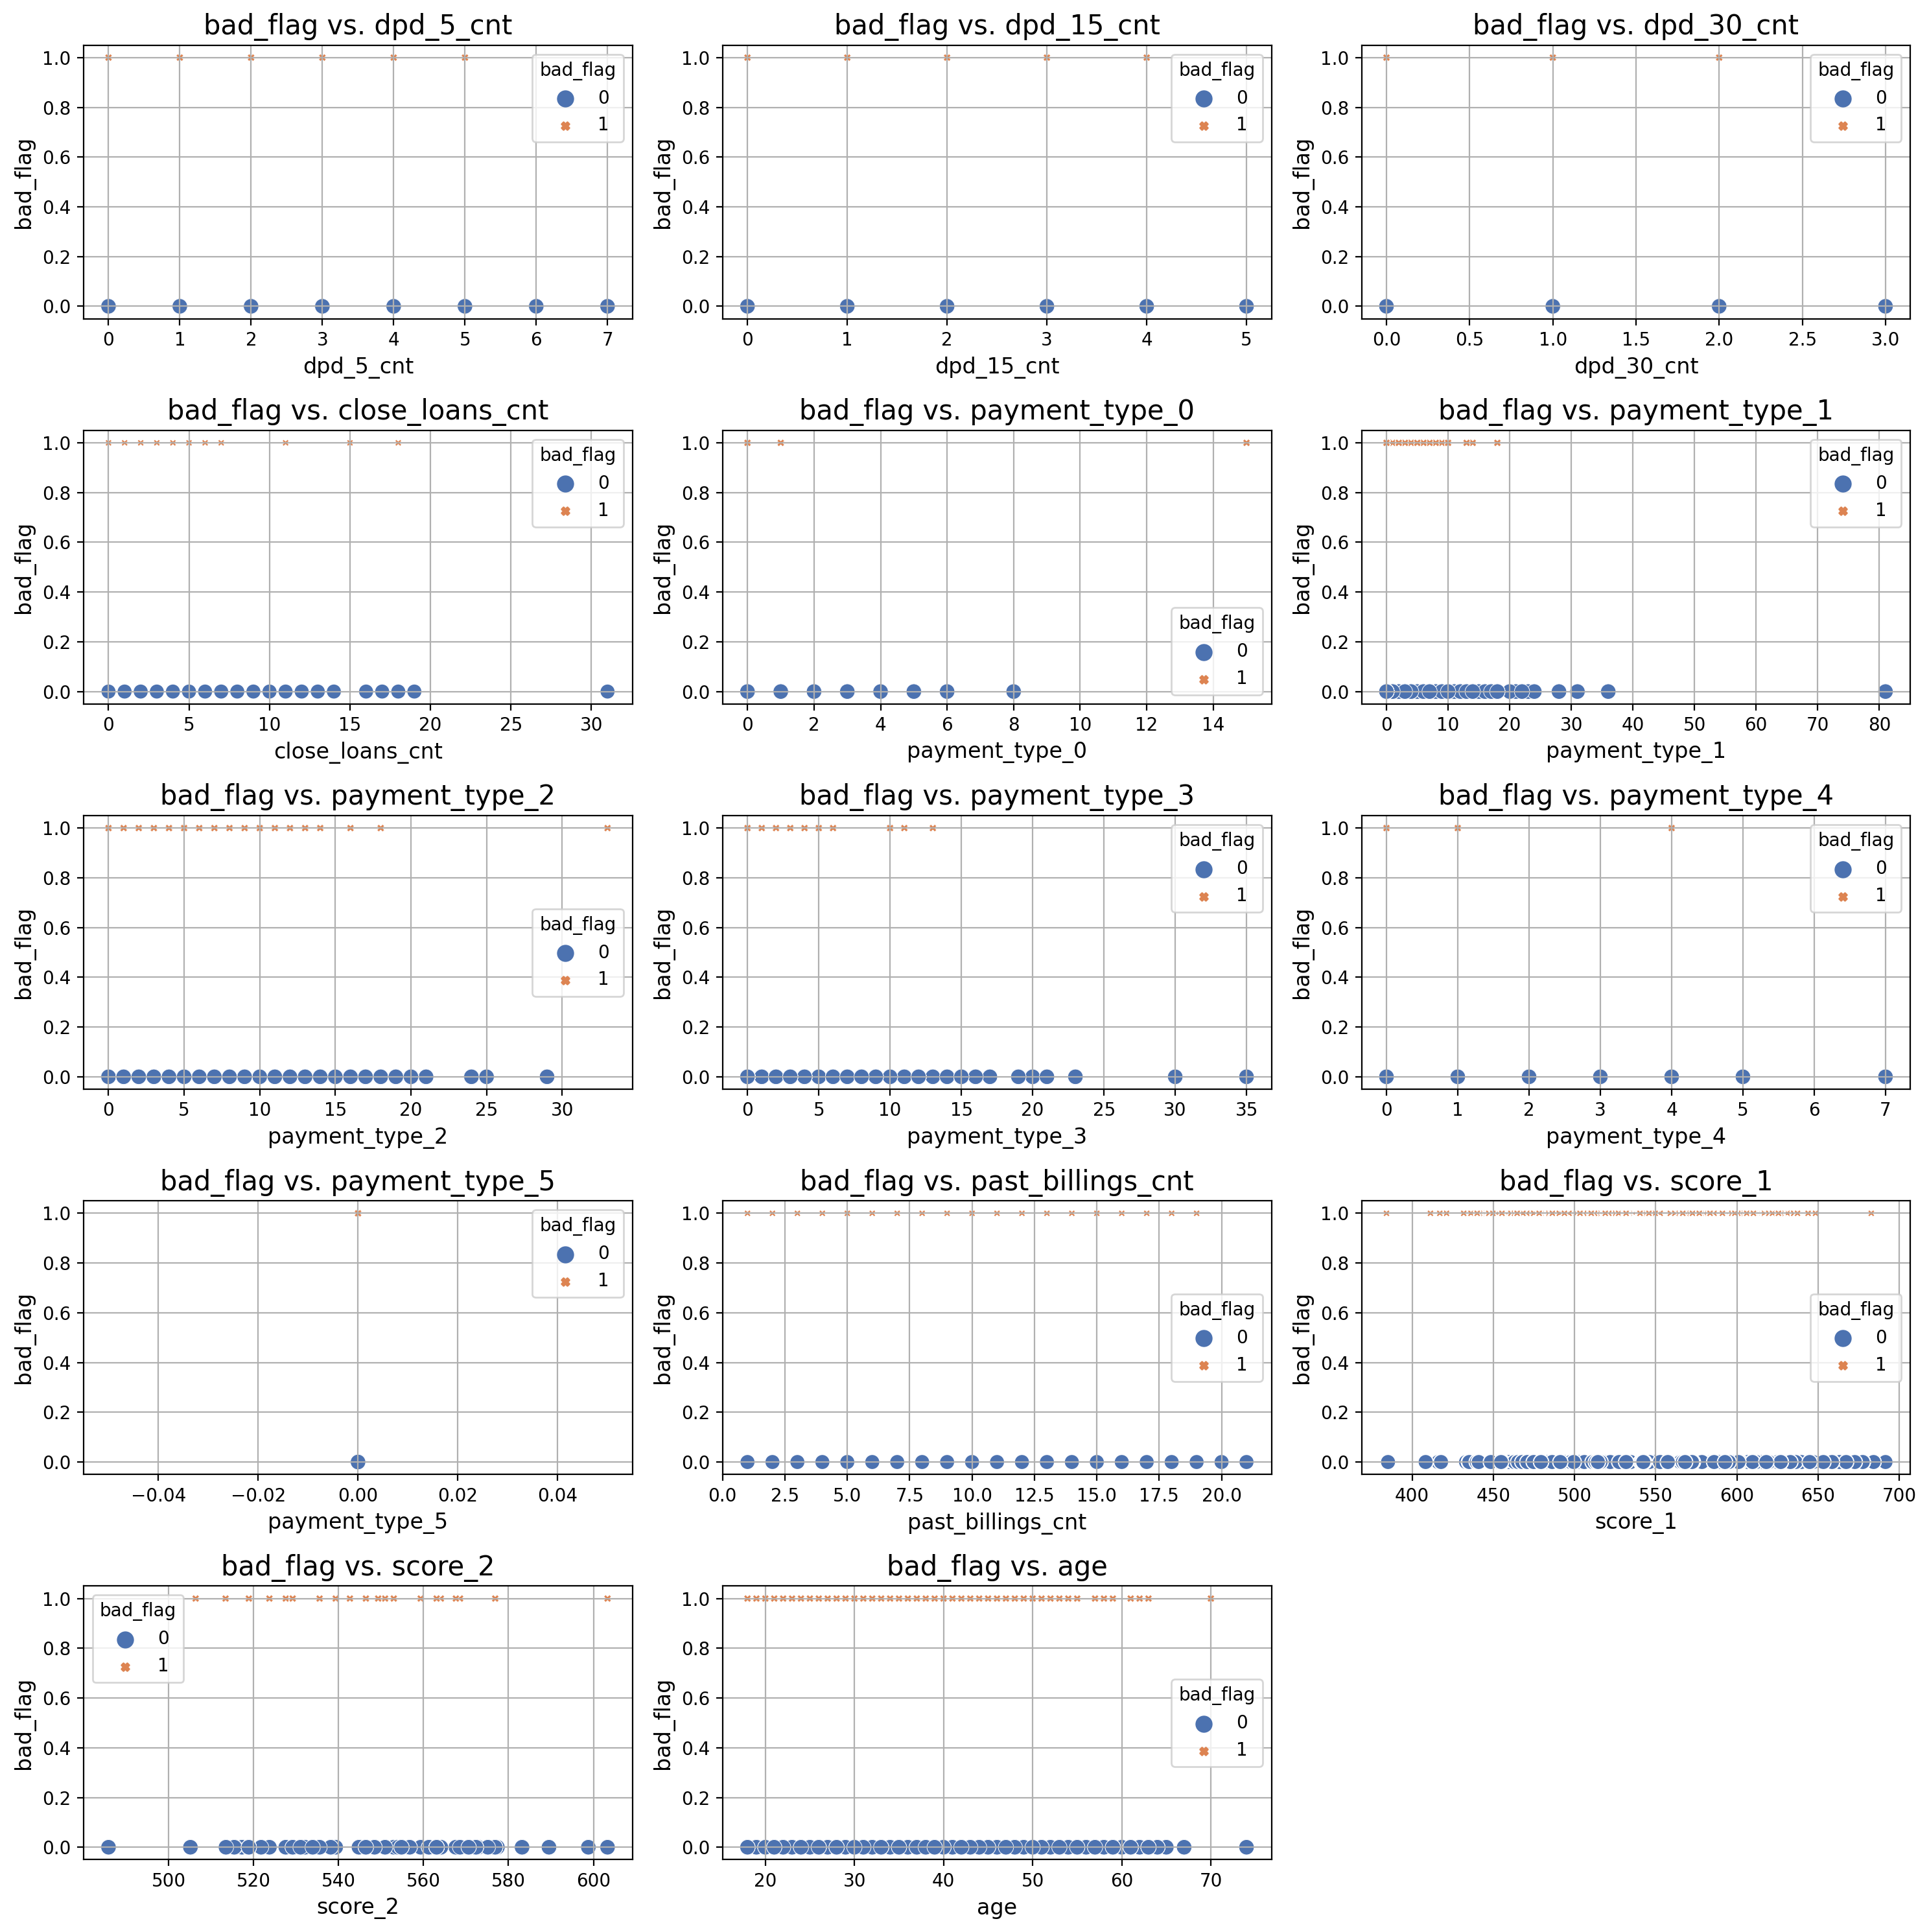

In [6]:
target = 'bad_flag'
features = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da']
CustomPalette = sns.set_palette(sns.color_palette(colors))

# Calculate the number of rows and columns needed
n_features = len(features)
ncols = 3
nrows = int(np.ceil(n_features / ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*3), dpi=200)

# Flatten the axes array to iterate over it
ax = ax.flatten()

for i in range(n_features):
    sns.scatterplot(data=df.select_dtypes(include=['int64', 'float64']), x=features[i], y=target, 
                    hue=target, ax=ax[i],style=target,palette="deep",size=target)
    ax[i].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[i].set_xlabel(features[i], size = 12)
    ax[i].set_ylabel(target, size = 12)
    ax[i].grid()

# Remove any unused subplots
if n_features % ncols != 0:
    for j in range(i+1, nrows*ncols):
        fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


In [7]:
# Let's check the parameter_5 because it looks interestins

df['payment_type_5'].value_counts()

0    4157
Name: payment_type_5, dtype: int64

##### From the plot above, we observe that there is no noise in the data. However, we observe that the parameter `payment_type_5` is a constant value for all observations in the dataset which is indeed true as it is **entirley** a column of zeros. Accordingly, it won’t provide any useful information for the analysis or the model, and we should remove it from the dataset.

In [8]:
# Remove the payment_type_5 variable
features = df.select_dtypes(include=['int64', 'float64']).columns
features = list(features)
features.remove('payment_type_5')
df.drop(["payment_type_5"], axis=1, inplace=True)

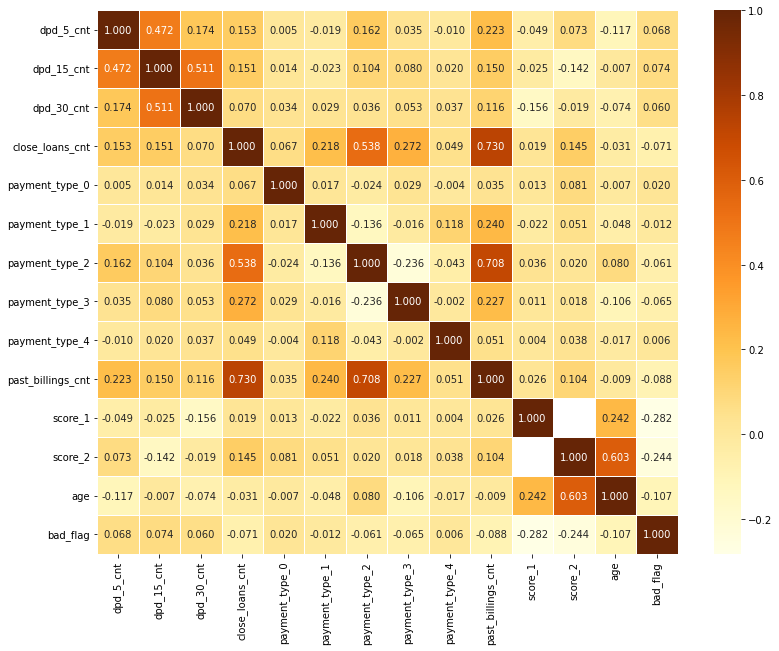

In [9]:
corr = df[features].select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr, annot=True, fmt='.3f', linewidths=0.5, linecolor='white', 
            cmap=sns.color_palette("YlOrBr", as_cmap=True))
plt.show()

In [10]:
# List the correlations with the target variable bad_flag
corr = df.select_dtypes(include=['int64', 'float64']).corr()
bad_flag_corr = corr['bad_flag']
print(bad_flag_corr)

dpd_5_cnt            0.067792
dpd_15_cnt           0.074312
dpd_30_cnt           0.059827
close_loans_cnt     -0.071205
payment_type_0       0.020062
payment_type_1      -0.011732
payment_type_2      -0.061194
payment_type_3      -0.065221
payment_type_4       0.006104
past_billings_cnt   -0.087922
score_1             -0.282438
score_2             -0.244053
age                 -0.106962
bad_flag             1.000000
Name: bad_flag, dtype: float64


The provided plot is a heatmap that represents the correlation between different variables in the dataset. Each cell in the heatmap corresponds to the correlation coefficient between two variables, with the variable names being indicated on the `x` and `y` axes. The correlation coefficient ranges from `-1` to `1`. 

- A correlation coefficient close to `1` indicates a strong positive correlation, meaning that when one variable increases, the other also tends to increase.
- A correlation coefficient close to `-1` indicates a strong negative correlation, meaning that when one variable increases, the other tends to decrease.
- A correlation coefficient close to `0` indicates no linear relationship between the variables.

In this heatmap, darker brown colors represent stronger positive correlations, while lighter brown to white colors represent weaker correlations. The numbers in each cell represent the actual value of the correlation coefficient.

From the heatmap, we can see that each variable has a perfect positive correlation (1.0) with itself, which is expected. There are also some moderate correlations between other variables indicated by lighter shades of blue.

This type of visualization is useful for quickly identifying relationships between pairs of variables. For example, if two variables are strongly correlated, they might convey similar information to a predictive model, and you might not need to include both.

**Please note that correlation does not imply causation. Even if two variables are strongly correlated, it doesn't necessarily mean that changes in one variable cause changes in the other.**

<a id="corr"></a>
## <b><span style="color:red">Coorelation Analysis</span></b>
From the heatmap, it appears that the target variable 'bad_flag' has varying degrees of correlation with other variables in the dataset. Here are some observations:

- **Positive Correlations**: Variables such as `dpd_5_cnt`, `dpd_15_cnt`, `dpd_30_cnt`, `payment_type_0`, and `payment_type_4` have positive correlations with `bad_flag`. This means that as these variables increase, `bad_flag` also tends to increase. However, these correlations are relatively weak.

- **Negative Correlations**: Variables such as `close_loans_cnt`, `payment_type_2`, `payment_type_3`, `past_billings_cnt`, `score_1`, `score_2`, and `age` have negative correlations with `bad_flag`. This means that as these variables increase, `bad_flag` tends to decrease, and vice versa. The strongest negative correlation is with `score_1` (-0.282438) and `score_2` (-0.244053).

- **Weak or No Correlations**: `payment_type_1` shows very weak negative correlations with `bad_flag`, and `payment_type_4` shows a very weak positive correlation. These values are close to 0, indicating no linear relationship.

Here's a brief interpretation of the correlations:

- `dpd_5_cnt`, `dpd_15_cnt`, and `dpd_30_cnt` have positive correlations with `bad_flag`, meaning that as these variables increase, `bad_flag` tends to increase as well. However, the correlation is weak (around 0.06 to 0.07).
- `close_loans_cnt`, `payment_type_2`, `payment_type_3`, `past_billings_cnt`, `score_1`, `score_2`, and `age` have negative correlations with `bad_flag`, indicating that as these variables increase, `bad_flag` tends to decrease. The strongest negative correlations are with `score_1` and `score_2` (around -0.28 and -0.24 respectively).
- `payment_type_0`, `payment_type_1`, and `payment_type_4` have very weak positive or negative correlations with `bad_flag`, suggesting little to no linear relationship.

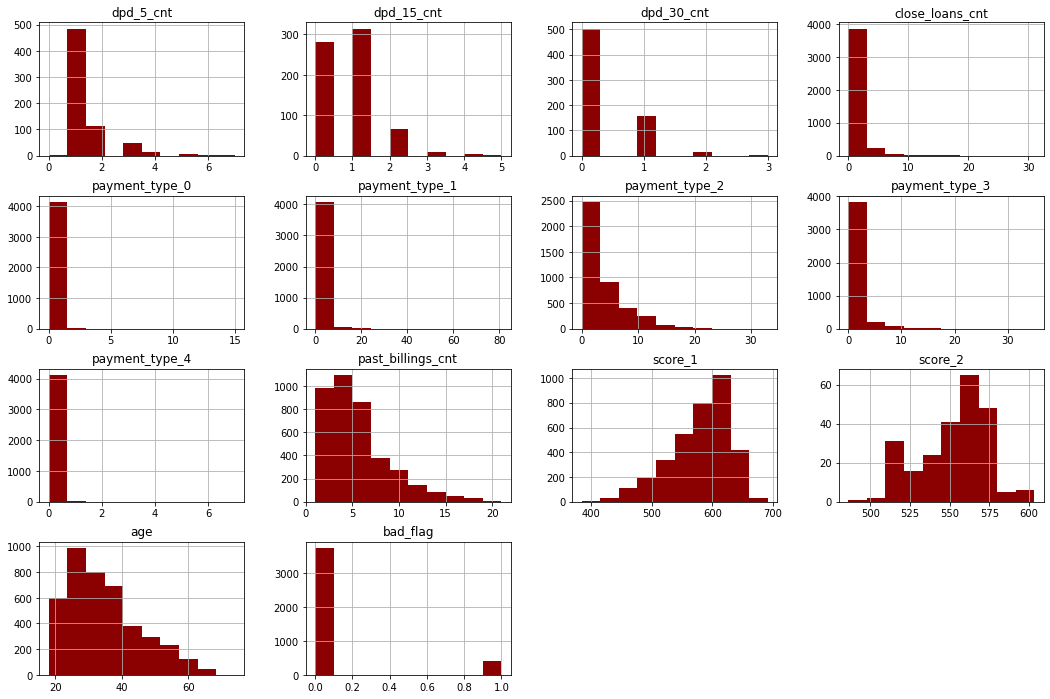

In [11]:
_ = df.hist(figsize=(18, 12), color="darkred")

##### Upon examining the histograms, we discern that the target variable `bad_flag`, located in the bottom right of the chart, comprises two classes: `0` and `1`. However, a closer inspection reveals an uneven distribution of observations across these classes. Specifically, the class labeled `0` is significantly overrepresented, while the class `1` is underrepresented. This phenomenon, often encountered in machine learning classification tasks, is referred to as `class imbalance`.

-------

<a id="import"></a>
# <p style="background:#00003f url('pylogo.jpg') no-repeat; font-family:tahoma; font-size:150%; color:white; text-align:center; border-radius:20px 30px; width:92%; padding:30px; font-weight:bold">Phase 3: Feature Engineering</p>


#### When working with temporal data, and you have dates in your features, a common consideration is to take the date difference as a feature (how much time it took between events).

In [12]:
# calculate difference in days between the first and the repeated loan
df[["rep_loan_date", "first_loan"]] = df[["rep_loan_date", "first_loan"]].apply(pd.to_datetime)
df["days_between_rep_and_first_loan"] = (df["rep_loan_date"] - df["first_loan"]).dt.days
features.append("days_between_rep_and_first_loan")
df.head()

,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,past_billings_cnt,score_1,score_2,age,gender,bad_flag,days_between_rep_and_first_loan
0,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,0,0,10,0,0,10.0,NaN,NaN,21.0,False,0,328
1,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,0,0,6,0,0,5.0,NaN,NaN,20.0,False,0,180
2,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,0,0,0,5,0,5.0,NaN,NaN,19.0,False,0,314
3,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,0,0,4,0,0,6.0,NaN,NaN,21.0,False,0,365
4,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,0,3,0,0,0,3.0,NaN,NaN,33.0,False,0,120


Next, we have the categorical variables. We have two in our data: `gender` and `federal_region`. The gender can be directly input into the model - it should get mapped to `True -> 1` and `False -> 0`. For the federal regions, for which we have eight possible values, we can use the pandas' `get_dummies()` method to generate 'dummy' columns for it.

In [13]:
federal_districts = pd.get_dummies(df["federal_district_nm"], prefix="federal")
federal_districts.head()

,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0


In [14]:
df = pd.concat(objs=[df, federal_districts], axis=1)

In [15]:
df['gender'] = df['gender'].replace({True: 1, False: 0})

In [16]:
# since most of the classifiers we're evaluating don't accept NaN values,
# we're replacing them with zeros - a neutral value
df.fillna(value=0, inplace=True)

------------------------------------

<a id="import"></a>
# <p style="background:#00003f url('pylogo.jpg') no-repeat; font-family:tahoma; font-size:150%; color:white; text-align:center; border-radius:20px 30px; width:92%; padding:30px; font-weight:bold">Phase 4: Algorithm Selection</p>

##### The problem we are facing is binary classification - we are trying to predict whether a customer is 'bad'. In this section, we will try different classifiers from the scikit-learn library.

##### `Precision`, `recall`, and `F1` score and the most common metrics for evaluating classifiers.

##### In the following few cells, we are going to build a few classifiers and evaluate them - first on the F1 score, and later on all three aforementioned metrics in a more visual and intuitive format.


In [17]:
features_column_names = list(df.columns)
columns_to_exclude = ['bad_flag', 'rep_loan_date', 'first_loan',
                             'first_overdue_date', 'federal_district_nm']
for col in columns_to_exclude:
    features_column_names.remove(col)
 
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(df[features_column_names], df["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=df["bad_flag"])

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3325 entries, 2417 to 2855
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   dpd_5_cnt                        3325 non-null   float64
 1   dpd_15_cnt                       3325 non-null   float64
 2   dpd_30_cnt                       3325 non-null   float64
 3   close_loans_cnt                  3325 non-null   float64
 4   payment_type_0                   3325 non-null   int64  
 5   payment_type_1                   3325 non-null   int64  
 6   payment_type_2                   3325 non-null   int64  
 7   payment_type_3                   3325 non-null   int64  
 8   payment_type_4                   3325 non-null   int64  
 9   past_billings_cnt                3325 non-null   float64
 10  score_1                          3325 non-null   float64
 11  score_2                          3325 non-null   float64
 12  age              

Small note here. The hyperparameters for the classifiers are set randomly at this point. In a later section, we perform hyperparameter optimization, which, is highly recommended in any real-world project and is a highly-valued skill, so keep on going through this project!

In [19]:
# define the classifiers in an array
classifiers = [
    SGDClassifier(max_iter=1000, tol=1e-3),
    KNeighborsClassifier(),
    LogisticRegression(solver="lbfgs"),
    LogisticRegressionCV(cv=3),
    BaggingClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100),
    ExtraTreesClassifier(n_estimators=100)
]

In [20]:
# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.17218543046357615
KNeighborsClassifier : 0.16822429906542055
LogisticRegression : 0.023255813953488372
LogisticRegressionCV : 0.0
BaggingClassifier : 0.0970873786407767
GaussianNB : 0.21951219512195122
RandomForestClassifier : 0.18556701030927836
ExtraTreesClassifier : 0.10638297872340426


The yellowbrick classification report enables us to see the model's performance on different classes. Try to empirically evaluate the reports and determine the best model/algorithm.

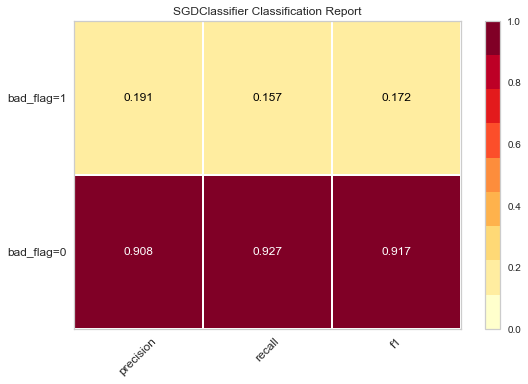

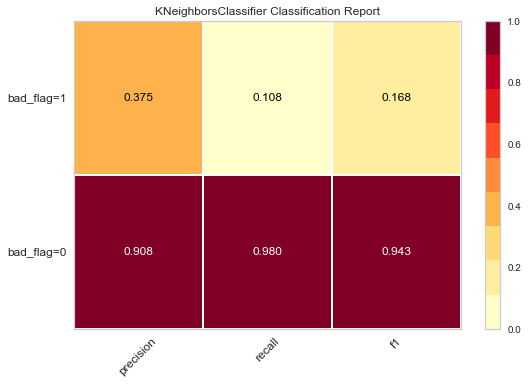

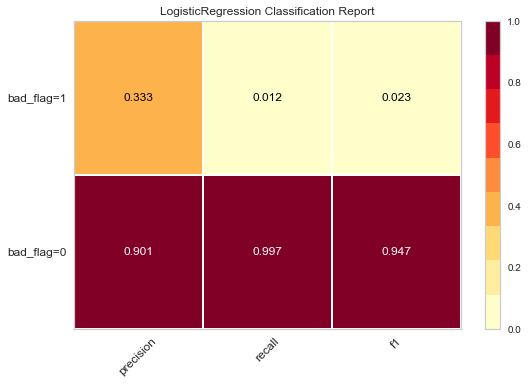

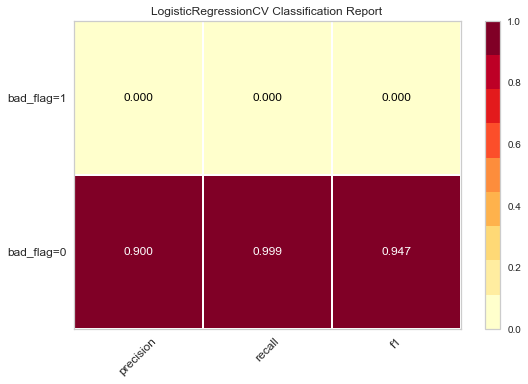

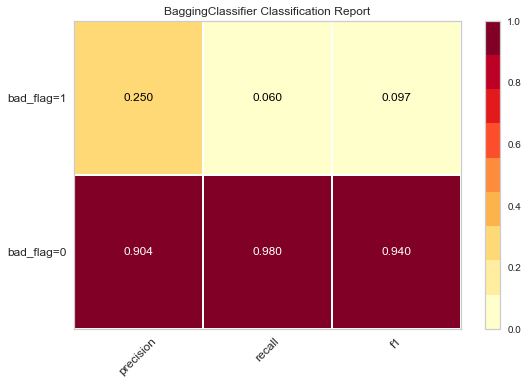

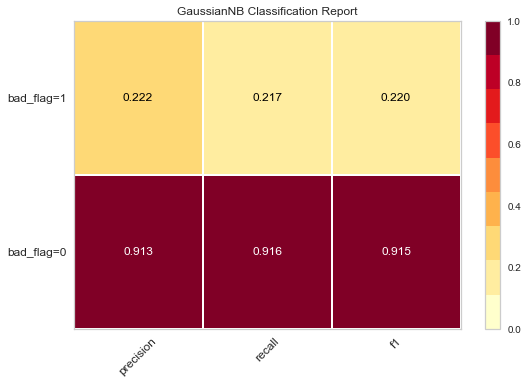

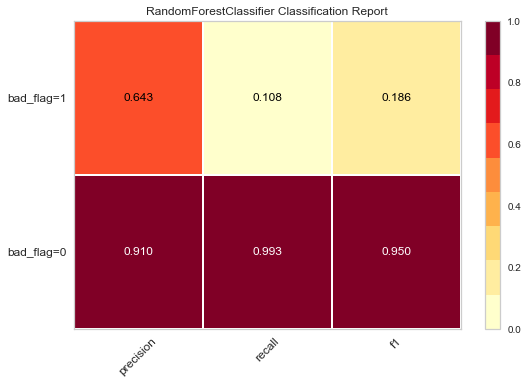

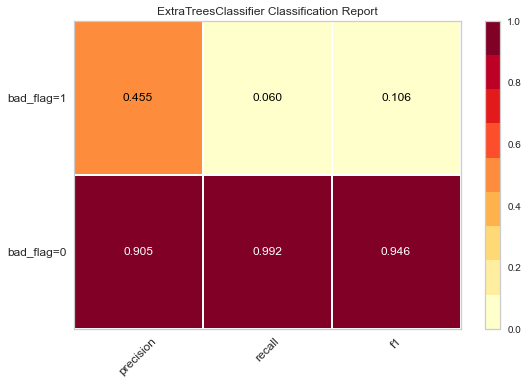

In [21]:
from yellowbrick.classifier import ClassificationReport

for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

##### As expected, since we have class imbalance in our target variable `bad_flag` this has lead to having the classifiers above being good at predicting the majority class but poor at predicting the minority class. This is because most machine learning algorithms work best when the number of samples in each class are about equal. This is known as a balanced dataset.

##### Thus, when one class significantly outnumbers the other, the learning algorithm can be heavily influenced by the majority class and ignore the minority class. This is because it can achieve high accuracy by simply predicting the majority class all the time. As a result, the model's ability to predict the minority class can be compromised, leading to poor performance on the minority class as seen in all the clasifiers above.

<a id="corr"></a>
## <b><span style="color:red">Addressing Class Imbalances</span></b>

The challenge with class-imbalanced data sets is that most machine learning algorithms ignore, or perform poorly on the minority class, which often is the most important class. To address the class imbalance, numerous methods have been developed. Amongst others, the most popular seem to be the following:

    1. Under-sampling the majority class
    2. Synthetically generating new data, e.g., SMOTE
    3. Over-sampling the minority class 
    4. Assigning class weights to the data samples

The goal of these methods is to bring more balanced class distribution into the data, in the hope that it will improve the performance of a machine learning algorithm, i.e., we would be able to build a better model.

<a id="corr"></a>
## <b><span style="color:red">Part 1: Under-sampling the Majority Class</span></b>

In [22]:
## under-sampling
pos_examples = df["bad_flag"].sum()
neg_examples = df.shape[0] - pos_examples

print("Positive examples", pos_examples, ", negative examples", neg_examples)

# we keep all positive examples
pos = df[df["bad_flag"] == 1]

# we use pandas' sample method to take randomly 20% of the negative / majority class
neg = df[df["bad_flag"] == 0].sample(frac=0.2)

print("Negative examples after under-sampling", neg.shape[0])

# concatenating the positive and sub-sampled negative examples
undersampled_df = pd.concat(objs=[pos, neg])

print("Final data shape", undersampled_df.shape)

Positive examples 417 , negative examples 3740
Negative examples after under-sampling 748
Final data shape (1165, 28)


In [23]:
# perform another train / test split with the new sampled data
X_train, X_test, y_train, y_test = train_test_split(undersampled_df[features_column_names], undersampled_df["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=undersampled_df["bad_flag"])


# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.06976744186046512
KNeighborsClassifier : 0.5280898876404494
LogisticRegression : 0.5039370078740157
LogisticRegressionCV : 0.5531914893617021
BaggingClassifier : 0.6012269938650306
GaussianNB : 0.5
RandomForestClassifier : 0.6540880503144654
ExtraTreesClassifier : 0.6097560975609756


All classifiers seem to have improved performance, with the Random Forest Classifier reaching an F1 score of approximatley 0.63! Let's visualize also the confusion matrices.

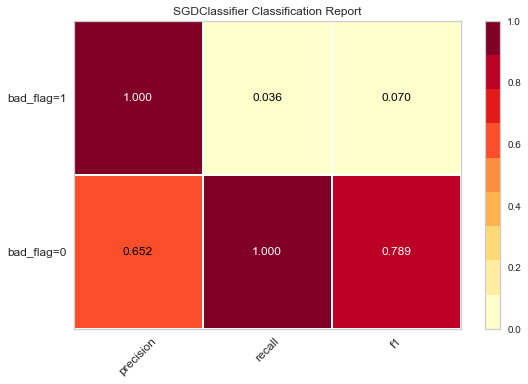

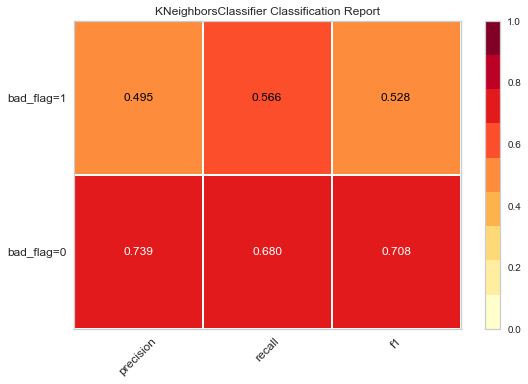

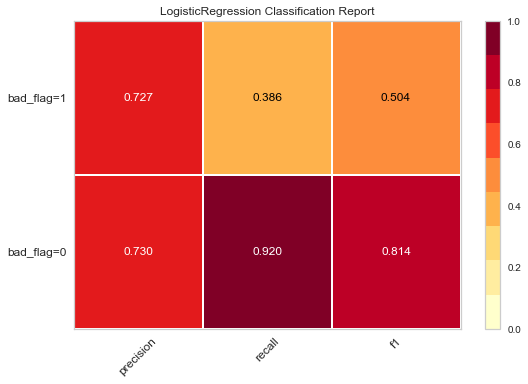

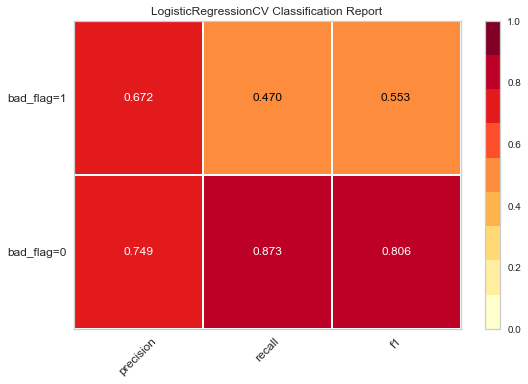

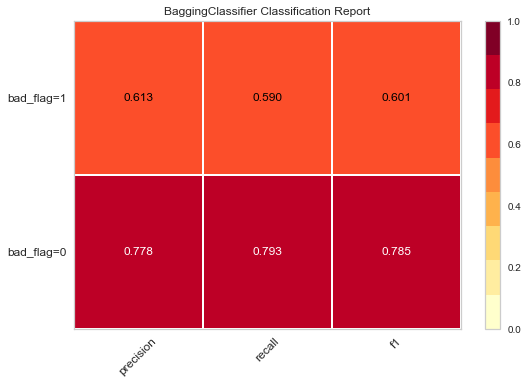

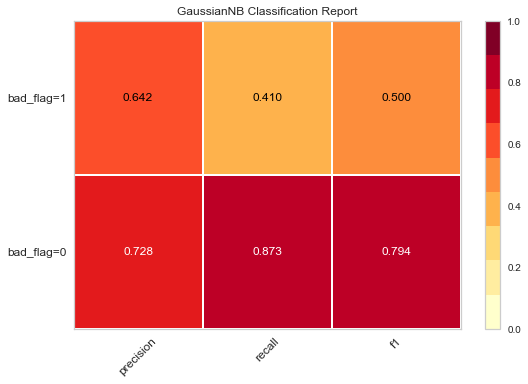

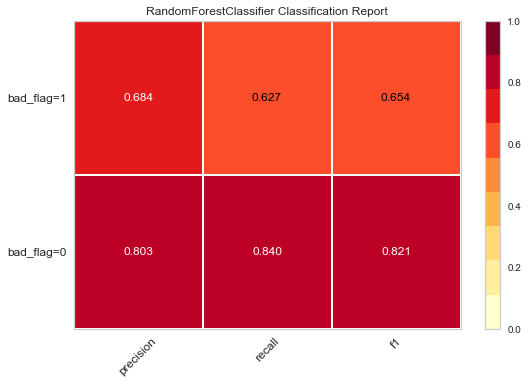

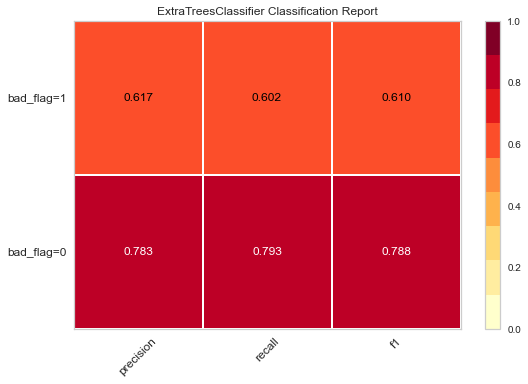

In [24]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

<a id="corr"></a>
## <b><span style="color:red">Part 2: Synthetically Generating New Data Using SMOTE</span></b>

In [25]:
features_column_names

['dpd_5_cnt',
 'dpd_15_cnt',
 'dpd_30_cnt',
 'close_loans_cnt',
 'payment_type_0',
 'payment_type_1',
 'payment_type_2',
 'payment_type_3',
 'payment_type_4',
 'past_billings_cnt',
 'score_1',
 'score_2',
 'age',
 'gender',
 'days_between_rep_and_first_loan',
 'federal_region_0',
 'federal_region_1',
 'federal_region_2',
 'federal_region_3',
 'federal_region_4',
 'federal_region_5',
 'federal_region_6',
 'federal_region_7']

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(df[features_column_names], df["bad_flag"])
new_data = pd.concat([X_resampled, y_resampled], axis=1)
new_data.head()

,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,past_billings_cnt,...,days_between_rep_and_first_loan,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7,bad_flag
0,0.0,0.0,0.0,3.0,0,0,10,0,0,10.0,...,328,0,0,0,0,0,0,1,0,0
1,1.0,0.0,0.0,0.0,0,0,6,0,0,5.0,...,180,0,0,0,0,0,0,1,0,0
2,0.0,0.0,0.0,2.0,0,0,0,5,0,5.0,...,314,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,1.0,0,0,4,0,0,6.0,...,365,0,0,0,0,0,0,1,0,0
4,0.0,0.0,0.0,0.0,0,3,0,0,0,3.0,...,120,0,0,0,0,0,1,0,0,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(new_data[features_column_names], new_data["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=new_data["bad_flag"])

In [28]:
# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.6547131147540983
KNeighborsClassifier : 0.8432432432432433
LogisticRegression : 0.8136775994417307
LogisticRegressionCV : 0.8589835361488904
BaggingClassifier : 0.9113747383112352
GaussianNB : 0.7747419550698239
RandomForestClassifier : 0.9200273410799726
ExtraTreesClassifier : 0.9253935660506503


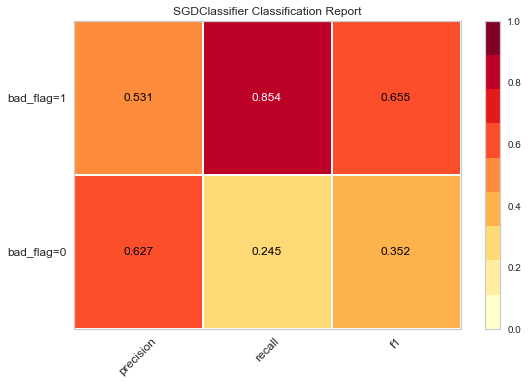

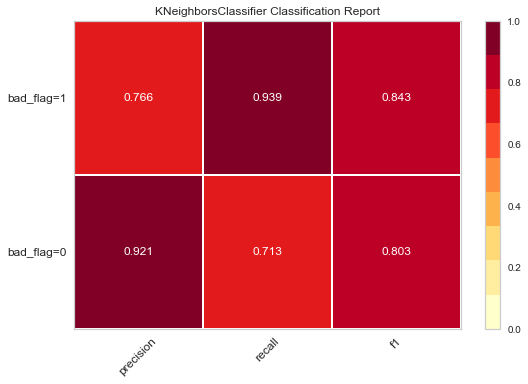

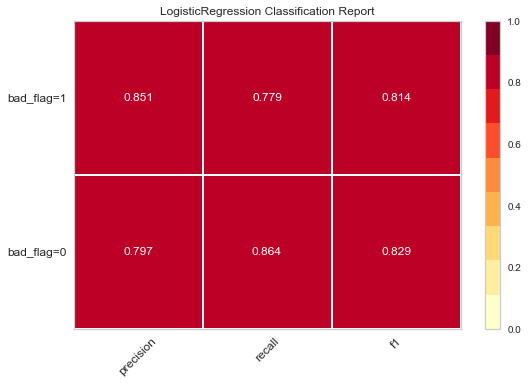

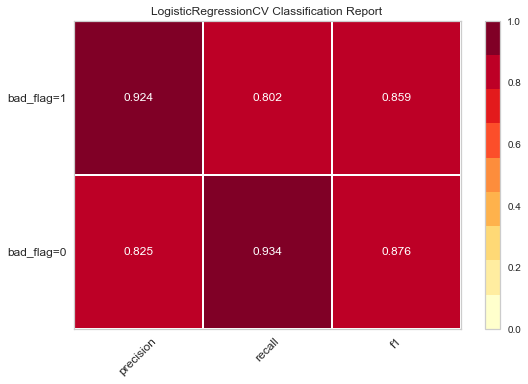

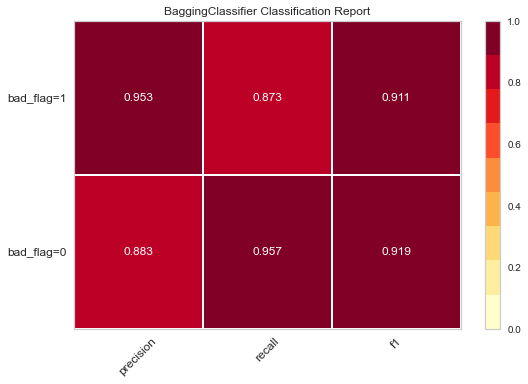

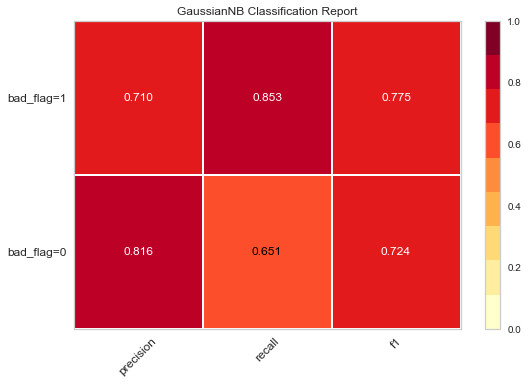

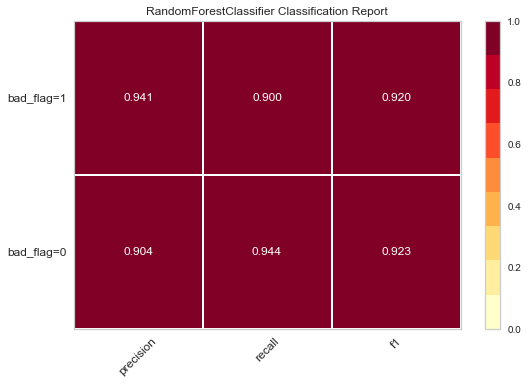

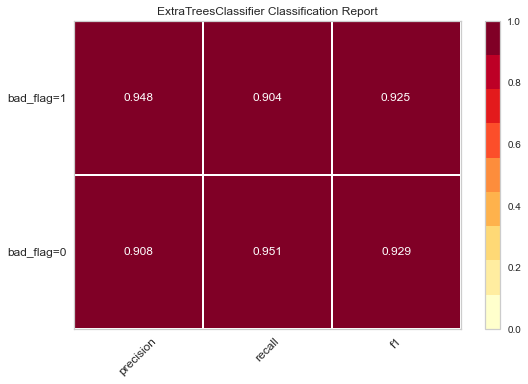

In [29]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

In [30]:
model = classifiers[-1]
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
print(model.__class__.__name__, ":", f1)

ExtraTreesClassifier : 0.9263592567102547


Cross-validation scores: [0.93684211 0.92748538 0.92280702 0.94853801 0.95087719 0.95204678
 0.95784543]
Mean cross-validation score: 0.9423488463547626


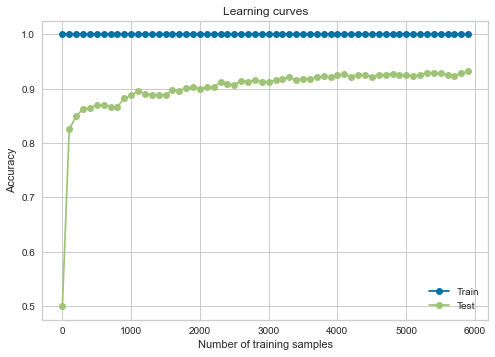

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=7)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# Learning curves
train_scores, test_scores = list(), list()
values = [i for i in range(1, len(X_train), 100)]  # adjust as needed

# evaluate a model for each size
for i in values:
    # define model
    model = ExtraTreesClassifier(n_estimators=100)
    # select samples
    trainX, trainY = X_train[:i], y_train[:i]
    # fit model
    model.fit(trainX, trainY)
    # evaluate train set
    train_pred = model.predict(trainX)
    train_acc = accuracy_score(trainY, train_pred)
    train_scores.append(train_acc)
    # evaluate test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)

# plot learning curves
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.title('Learning curves')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Feature ranking:
1. feature score_1 (0.124817)
2. feature days_between_rep_and_first_loan (0.076717)
3. feature federal_region_2 (0.072731)
4. feature federal_region_3 (0.069866)
5. feature federal_region_6 (0.069359)
6. feature age (0.066878)
7. feature federal_region_4 (0.060793)
8. feature past_billings_cnt (0.056114)
9. feature payment_type_2 (0.047414)
10. feature federal_region_1 (0.046146)
11. feature dpd_5_cnt (0.045807)
12. feature dpd_15_cnt (0.042030)
13. feature federal_region_0 (0.041268)
14. feature close_loans_cnt (0.037493)
15. feature federal_region_5 (0.030370)
16. feature dpd_30_cnt (0.028532)
17. feature payment_type_3 (0.026738)
18. feature federal_region_7 (0.016815)
19. feature payment_type_1 (0.013737)
20. feature gender (0.011973)
21. feature score_2 (0.010274)
22. feature payment_type_4 (0.002904)
23. feature payment_type_0 (0.001223)


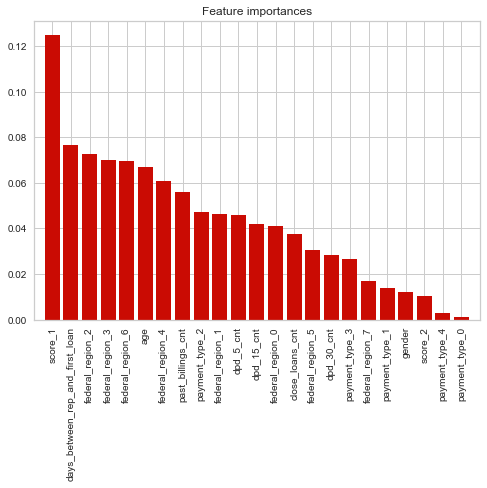

In [32]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X_train.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()